In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [134]:
import warnings
warnings.filterwarnings(action='ignore')

In [135]:
df = pd.read_csv('EV_Dataset.csv')
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


## Data Exploration

In [136]:
df.shape

(96845, 8)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [138]:
df.isnull().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

In [139]:
df.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis

Vehicle_Class
MOTOR CAR          4111
M-CYCLE/SCOOTER    4101
GOODS CARRIER      4096
MOTOR CAB          3985
BUS                3813
Name: count, dtype: int64


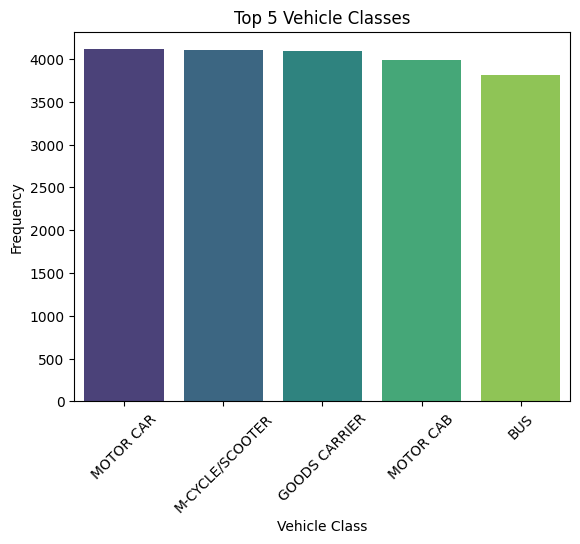

In [140]:
top_n = 5
top_vehicle_classes = df['Vehicle_Class'].value_counts().nlargest(top_n)
print(top_vehicle_classes)

sns.barplot(x=top_vehicle_classes.index, y=top_vehicle_classes.values, palette="viridis")
plt.title(f'Top {top_n} Vehicle Classes')
plt.xlabel('Vehicle Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


                       Year  EV_Sales_Quantity
Year               1.000000           0.095326
EV_Sales_Quantity  0.095326           1.000000


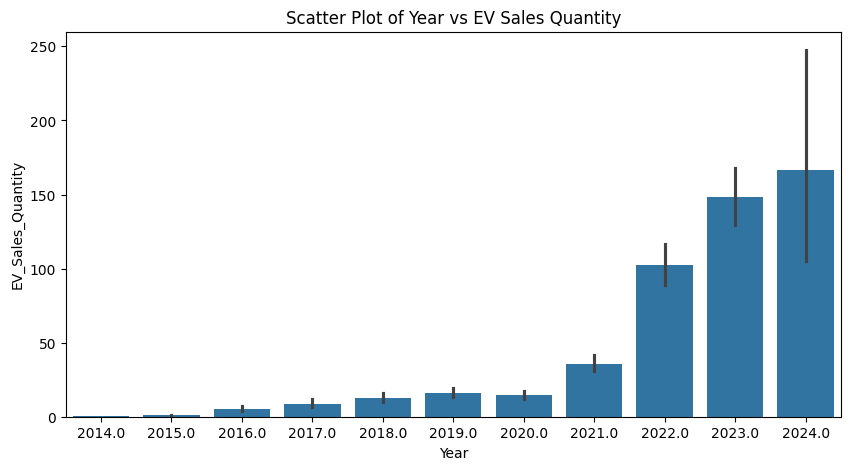

In [141]:
corr = df[['Year', 'EV_Sales_Quantity']].corr()
print(corr)

# Scatter plot
plt.figure(figsize = (10,5))
sns.barplot(x='Year', y='EV_Sales_Quantity', data=df)
plt.title('Scatter Plot of Year vs EV Sales Quantity')
plt.show()

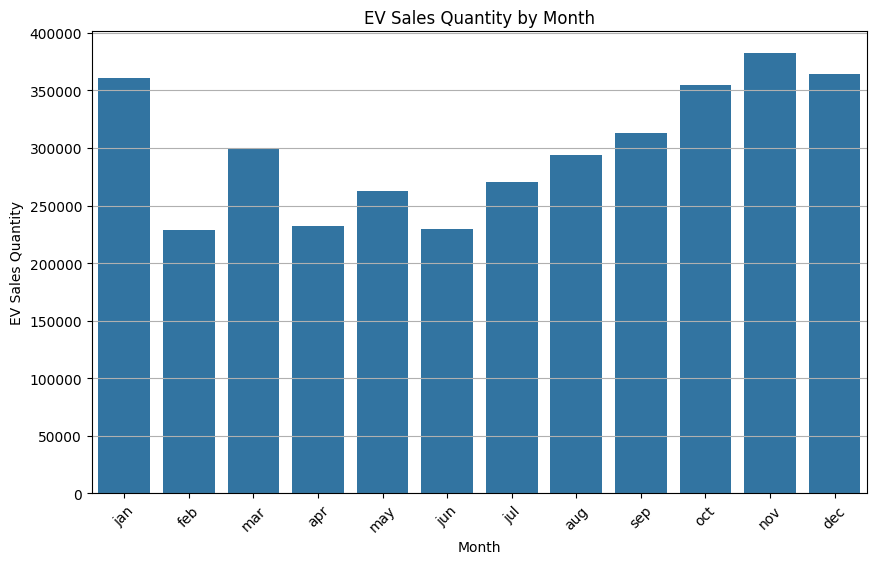

In [142]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df, x='Month_Name', y='EV_Sales_Quantity', estimator=sum, errorbar=None)

plt.title('EV Sales Quantity by Month')
plt.xlabel('Month')
plt.ylabel('EV Sales Quantity')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

Vehicle_Type
2W_Personal           153.533333
2W_Shared               8.279381
3W_Goods               14.019327
3W_Goods_LowSpeed      59.760053
3W_Personal             0.409135
3W_Shared              20.108822
3W_Shared_LowSpeed    721.746284
4W_Personal            31.786913
4W_Shared               4.170087
Bus                     0.997580
Institution Bus         0.000000
Others                  0.158242
Name: EV_Sales_Quantity, dtype: float64


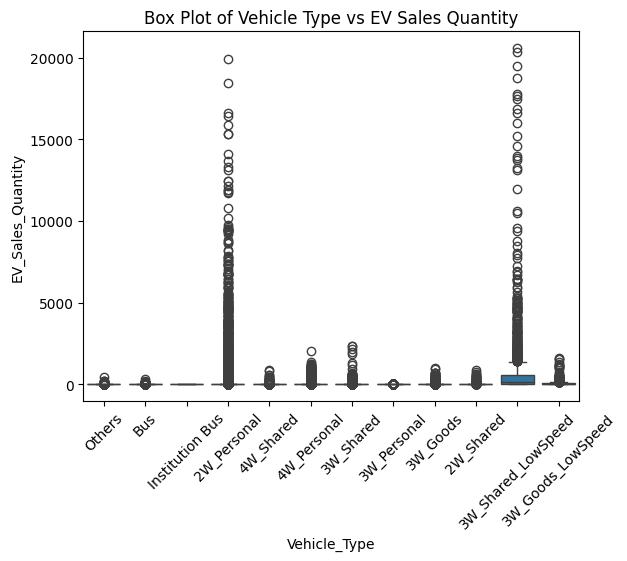

In [120]:
print(df.groupby('Vehicle_Type')['EV_Sales_Quantity'].mean())

# Box plot
sns.boxplot(x='Vehicle_Type', y='EV_Sales_Quantity', data=df)
plt.title('Box Plot of Vehicle Type vs EV Sales Quantity')
plt.xticks(rotation=45)
plt.show()

In [121]:
crosstab = pd.crosstab(df['State'], df['Vehicle_Class'])
print(crosstab)

# Stacked bar chart
# crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
# plt.title('Stacked Bar Chart of State vs Vehicle Class')
# plt.xlabel('State')
# plt.ylabel('Count')
# plt.legend(title='Vehicle Class')
# plt.show()

Vehicle_Class             ADAPTED VEHICLE  AGRICULTURAL TRACTOR  AMBULANCE  \
State                                                                        
Andaman & Nicobar Island                3                    11         20   
Andhra Pradesh                        107                   121        118   
Arunachal Pradesh                      21                    83         75   
Assam                                   8                    96        121   
Bihar                                  69                   121         95   
Chandigarh                             75                    57         99   
Chhattisgarh                          112                   121        121   
DNH and DD                             11                   100         63   
Delhi                                 119                    67        114   
Goa                                    95                   113         69   
Gujarat                               121                   121 

1. Aggregate Sales Data by State

In [123]:
# Aggregate EV sales by state
state_sales_summary = df.groupby('State')['EV_Sales_Quantity'].agg(
    total_sales='sum',
    avg_sales='mean',
    std_dev='std',
    max_sales='max',
    min_sales='min'
).reset_index()

# Sort states by total sales
state_sales_summary = state_sales_summary.sort_values('total_sales', ascending=False)
print(state_sales_summary.head(10))  # Top 10 states by total EV sales


            State  total_sales   avg_sales      std_dev  max_sales  min_sales
31  Uttar Pradesh     732074.0  160.648233  1204.473009    20584.0        0.0
19    Maharashtra     401535.0   81.745725   883.279541    19908.0        0.0
15      Karnataka     315498.0   65.320497   671.294823    16602.0        0.0
8           Delhi     268538.0  143.526456   487.270677     5380.0        0.0
27      Rajasthan     228573.0   50.213752   383.609897     8749.0        0.0
4           Bihar     213465.0   83.909198   535.650899     8032.0        0.0
29     Tamil Nadu     206902.0   50.923456   447.183587     9624.0        0.0
10        Gujarat     176713.0   39.121762   425.094397     8843.0        0.0
3           Assam     151917.0   48.785164   363.360099     5619.0        0.0
16         Kerala     133246.0   36.346427   361.061649     7383.0        0.0


(a) Bar Plot of Total Sales by State.


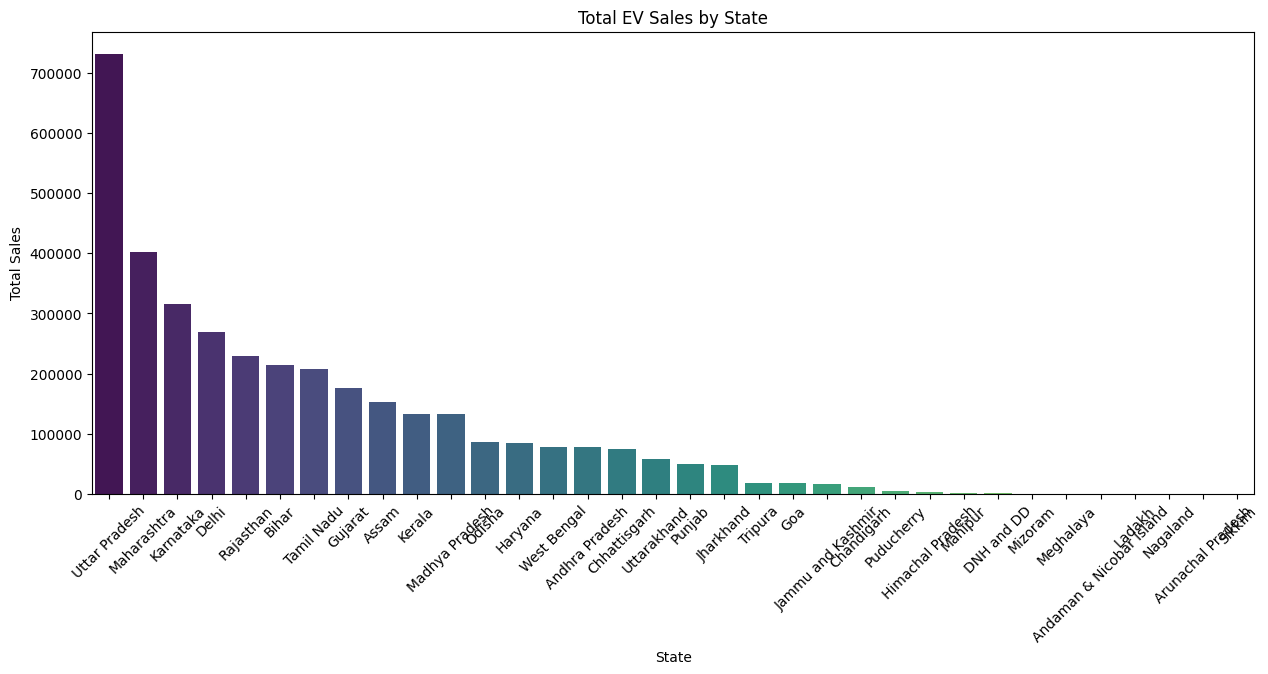

In [124]:
plt.figure(figsize=(15, 6))
sns.barplot(x='State', y='total_sales', data=state_sales_summary, palette='viridis')
plt.title('Total EV Sales by State')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.xlabel('State')
plt.show()

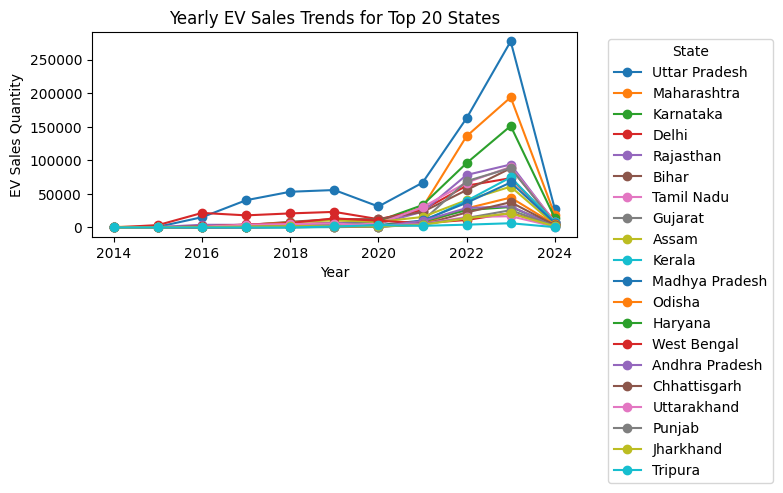

In [145]:
# Group by State and Year to analyze sales trends
state_yearly_sales = df.groupby(['State', 'Year'])['EV_Sales_Quantity'].sum().unstack()

# Line plot for selected top states
top_states = state_sales_summary['State'].head(20)  # Select top 5 states
state_yearly_sales.loc[top_states].T.plot(figsize=(8, 4), marker='o')
plt.title('Yearly EV Sales Trends for Top 20 States')
plt.ylabel('EV Sales Quantity')
plt.xlabel('Year')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout() 
plt.show()


In [23]:

data = pd.read_csv('EV_Dataset.csv')

data = data[['State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity']]

# Perform segmentation
segmented_data = data.groupby(['State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type']).sum().reset_index()

# Save the segmented data to a new CSV file 
segmented_data.to_csv('segmented_data.csv', index=False)

print(segmented_data)


                         State                   Vehicle_Class  \
0     Andaman & Nicobar Island                 ADAPTED VEHICLE   
1     Andaman & Nicobar Island            AGRICULTURAL TRACTOR   
2     Andaman & Nicobar Island                       AMBULANCE   
3     Andaman & Nicobar Island                             BUS   
4     Andaman & Nicobar Island  CONSTRUCTION EQUIPMENT VEHICLE   
...                        ...                             ...   
1755               West Bengal          TRAILER (AGRICULTURAL)   
1756               West Bengal            TRAILER (COMMERCIAL)   
1757               West Bengal  VEHICLE FITTED WITH COMPRESSOR   
1758               West Bengal   VEHICLE FITTED WITH GENERATOR   
1759               West Bengal         VEHICLE FITTED WITH RIG   

     Vehicle_Category Vehicle_Type  EV_Sales_Quantity  
0              Others       Others                0.0  
1              Others       Others                0.0  
2              Others       Others     

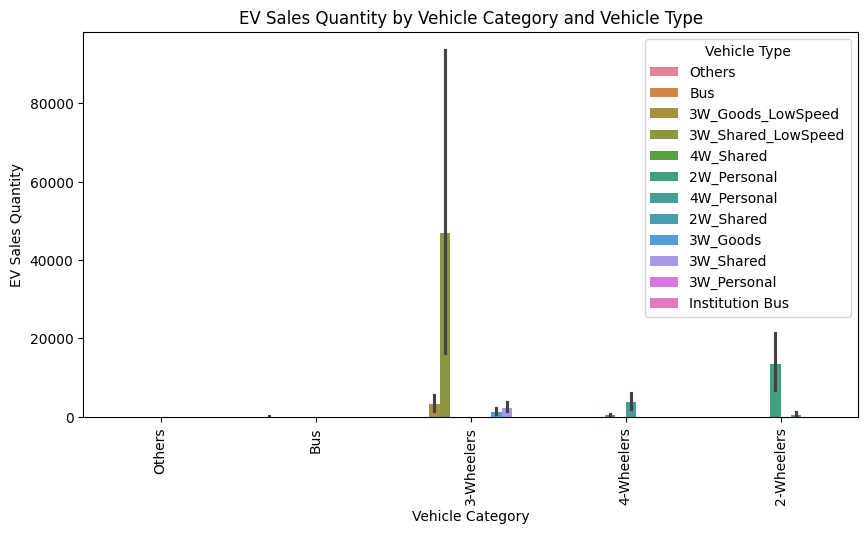

In [24]:
# Load the segmented data
segmented_data = pd.read_csv('segmented_data.csv')


# Plotting EV Sales Quantity for each Vehicle Category
plt.figure(figsize=(10,5))
sns.barplot(data=segmented_data, x='Vehicle_Category', y='EV_Sales_Quantity', hue='Vehicle_Type')
plt.title('EV Sales Quantity by Vehicle Category and Vehicle Type')
plt.xticks(rotation=90)
plt.xlabel('Vehicle Category')
plt.ylabel('EV Sales Quantity')
plt.legend(title='Vehicle Type')
plt.show()


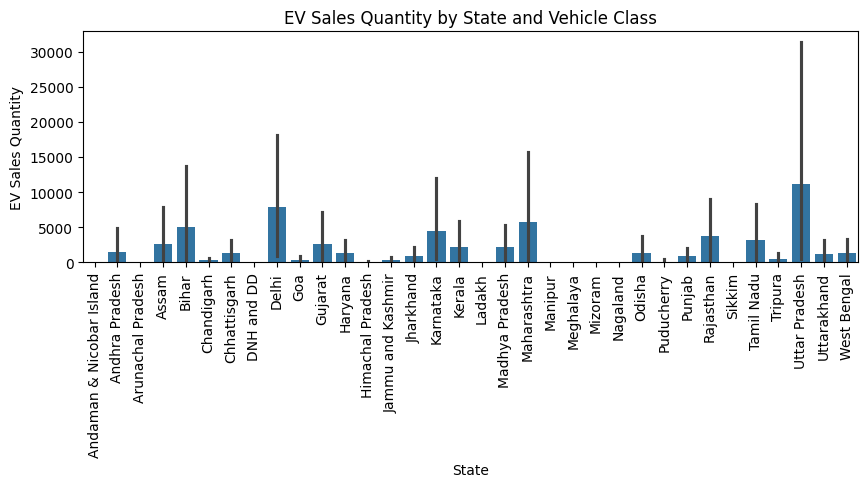

In [25]:
# Plotting EV Sales Quantity for each State
plt.figure(figsize=(10,3))
sns.barplot(data=segmented_data, x='State', y='EV_Sales_Quantity',)
plt.title('EV Sales Quantity by State and Vehicle Class')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('EV Sales Quantity')
plt.show()


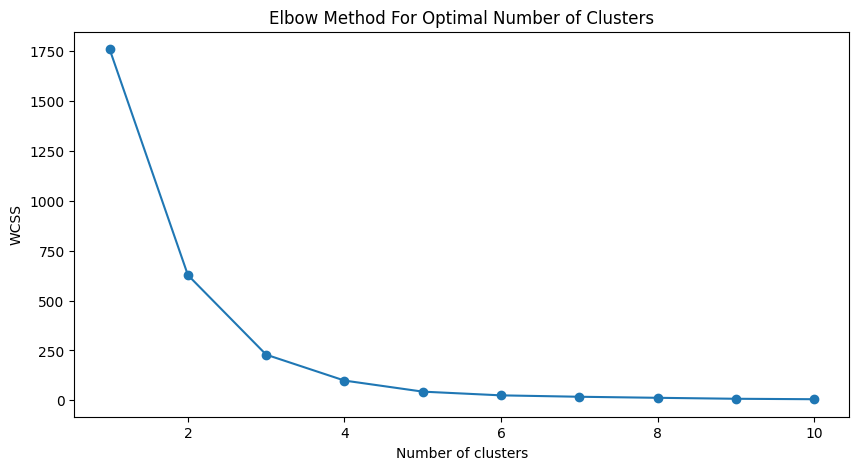

In [26]:


# Select the features for clustering
features = ['EV_Sales_Quantity']
segmented_data_for_clustering = segmented_data[features]

# Normalize the data
scaler = StandardScaler()
segmented_data_scaled = scaler.fit_transform(segmented_data_for_clustering)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(segmented_data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()




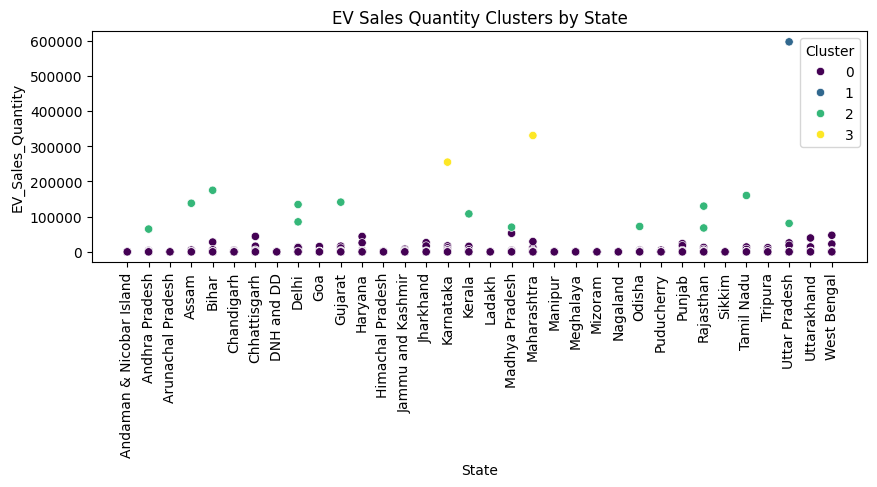

In [27]:
# Apply K-means clustering
optimal_clusters = 4  # Choose the number of clusters based on the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
segmented_data['Cluster'] = kmeans.fit_predict(segmented_data_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 3))
sns.scatterplot(data=segmented_data, x='State', y='EV_Sales_Quantity', hue='Cluster', palette='viridis')
plt.title('EV Sales Quantity Clusters by State')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('EV_Sales_Quantity')
plt.legend(title='Cluster')
plt.show()